In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
root_folder = "/Users/paola/OneDrive - Universiteit Antwerpen/DAEMON/Dynasim/experiments/nokia_results"
os.chdir(root_folder)
test_traces = "nokia_traces.csv"

print(test_traces)

nokia_traces.csv


In [3]:
nokia_results = pd.read_csv(test_traces)

In [4]:
nokia_results

,Unnamed: 0,work,VNFs,cpu,overflow,latency
0,0,4.886667,2,0.0000,0.0000,0.0033
1,1,4.923333,2,0.6667,0.0000,0.0083
2,2,4.976667,2,1.0000,1.4433,0.0239
3,3,4.876667,2,1.0000,2.9050,0.0399
4,4,4.913333,3,0.6667,2.9289,0.0559
...,...,...,...,...,...,...
172794,172794,5.073333,5,1.0000,0.4380,0.0174
172795,172795,5.053333,5,1.0000,0.4600,0.0177
172796,172796,5.036667,5,1.0000,0.4747,0.0179
172797,172797,5.076667,5,1.0000,0.4853,0.0180


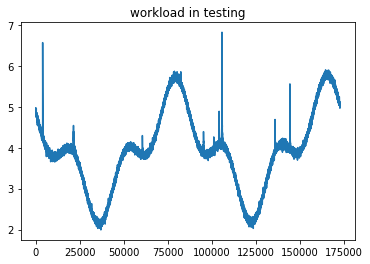

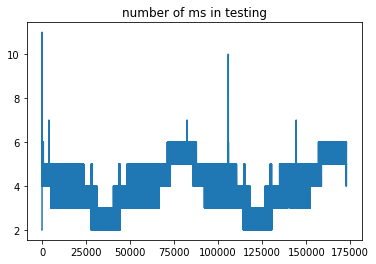

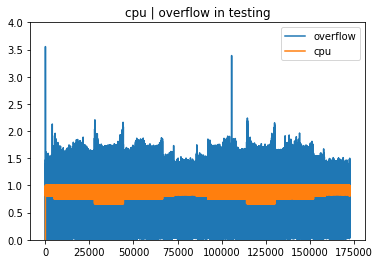

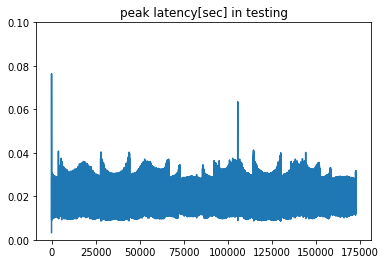

In [13]:
# test figures
# --------------- workload ------------------------------
plt.figure()
plt.plot(nokia_results["work"])
plt.title("workload in testing")
# plt.savefig('./workload_test.png', dpi=300)
plt.show()

# --------------- num ms ------------------------------
plt.figure()
plt.plot(nokia_results["VNFs"])
plt.title("number of ms in testing")
# plt.savefig('./ms_test.png', dpi=300)
plt.show()

# --------------- cpu|overflow ------------------------------
plt.figure()
plt.plot(nokia_results["overflow"], label="overflow")
plt.plot(nokia_results["cpu"], label="cpu")
plt.ylim([0, 4])
plt.title("cpu | overflow in testing")
plt.legend()
# plt.savefig('./cpu_overflow_test.png', dpi=300)
plt.show()

# --------------- peak latency ------------------------------
plt.figure()
plt.plot(nokia_results["latency"])
plt.ylim([0, 0.1])
plt.title("peak latency[sec] in testing")
# plt.savefig('./peak_latency_test.png', dpi=300)
plt.show()

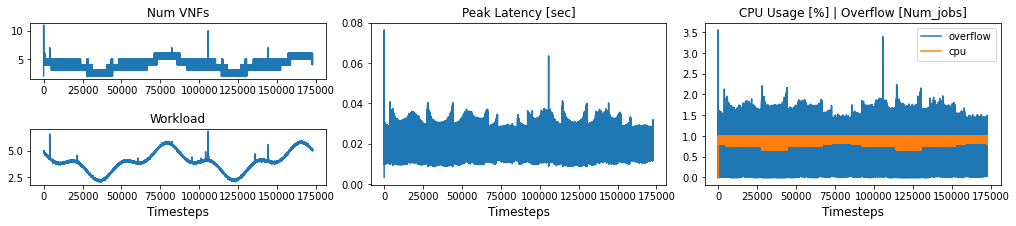

In [6]:
# plots for paper
fontsize=12

fig = plt.figure(constrained_layout=True, figsize=(14,3))
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(nokia_results["VNFs"], label='VNF')
ax1.set_title('Num VNFs', fontsize=fontsize)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(nokia_results["work"], label='Work')
ax2.set_xlabel('Timesteps', fontsize=fontsize)
ax2.set_title('Workload', fontsize=fontsize)
ax2.sharex(ax1)
ax3 = fig.add_subplot(gs[0:, 1])
ax3.plot(nokia_results["latency"], label='peak_lat')
ax3.set_xlabel('Timesteps', fontsize=fontsize)
ax3.set_title('Peak Latency [sec]', fontsize=fontsize)
ax4 = fig.add_subplot(gs[0:, 2])
ax4.plot(nokia_results["overflow"], label='overflow')
ax4.plot(nokia_results["cpu"], label='cpu')
ax4.set_xlabel('Timesteps', fontsize=fontsize)
ax4.set_title('CPU Usage [%] | Overflow [Num_jobs]', fontsize=fontsize)
ax4.legend()

plt.savefig('./results_nokia_paper.png', dpi=300)
plt.show()

In [7]:
print(nokia_results.describe())

         Unnamed: 0           work           VNFs            cpu  \
count  172799.00000  172799.000000  172799.000000  172799.000000   
mean    86399.00000       3.947064       4.048177       0.965604   
std     49882.91892       0.948677       1.095768       0.061704   
min         0.00000       1.990000       2.000000       0.000000   
25%     43199.50000       3.516667       3.000000       0.959200   
50%     86399.00000       3.940000       4.000000       0.992500   
75%    129598.50000       4.380000       5.000000       1.000000   
max    172798.00000       6.823333      11.000000       1.000000   

            overflow        latency  
count  172799.000000  172799.000000  
mean        0.660124       0.020000  
std         0.463357       0.006371  
min         0.000000       0.003300  
25%         0.230000       0.014300  
50%         0.624200       0.019600  
75%         1.036700       0.025100  
max         3.554400       0.076400  


In [8]:
# SLO Violations
peak = nokia_results["latency"]
total_slo_measurements = len(peak)
peak = peak[peak>0.02]
total_slo_violations = len(peak)
print(f"Total of SLO violations: {total_slo_violations}")
perc_slo_violations = total_slo_violations/total_slo_measurements
print(f"Percentage of SLO violations: {perc_slo_violations:2.2%}")

Total of SLO violations: 82733
Percentage of SLO violations: 47.88%


In [9]:
nokia_results.loc[nokia_results['latency'] > 0.02, 'slo_violation'] = 1.0
nokia_results.loc[nokia_results['latency'] <= 0.02, 'slo_violation'] = 0.0
nokia_results[nokia_results.slo_violation==1.0].count()

Unnamed: 0       82733
work             82733
VNFs             82733
cpu              82733
overflow         82733
latency          82733
slo_violation    82733
dtype: int64

In [10]:
nokia_results['counter'] = nokia_results['slo_violation'].diff().ne(0).cumsum()

In [11]:
df2 = nokia_results.groupby('counter')['slo_violation'].min().to_frame(name='value').join(nokia_results.groupby('counter')['slo_violation'].count().rename('number'))
max_consec0 = df2[df2['value']==0]['number'].tolist()
max_consec1 = df2[df2['value']==1]['number'].tolist()

Text(0, 0.5, 'p')

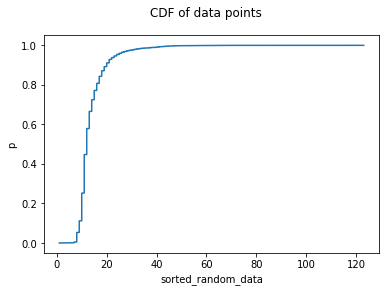

In [12]:
import matplotlib.pyplot as plt
import numpy

# data = numpy.random.randn(1000)
# print("The data is-",data)
sorted_random_data = numpy.sort(max_consec1)
p = 1. * numpy.arange(len(sorted_random_data)) / float(len(sorted_random_data) - 1)
# print("The CDF result is-",p)

fig = plt.figure()
fig.suptitle('CDF of data points')
ax2 = fig.add_subplot(111)
ax2.plot(sorted_random_data, p)
ax2.set_xlabel('sorted_random_data')
ax2.set_ylabel('p')